## Part 1

In [77]:
import pandas as pd
import json
from pandas.io.json import json_normalize

In [78]:
logins = json.load((open('logins.json')))

In [79]:
logins

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [80]:
login = pd.DataFrame.from_dict(logins)

In [81]:
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [82]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [83]:
login['login_time'] = login['login_time'].astype('datetime64[ns]')

In [84]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [85]:
login.sort_values(by='login_time').head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [86]:
login15 = login.resample('15min',on='login_time').count()

In [87]:
login15.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [88]:
login_hour = login.resample('H',on='login_time').count()

In [89]:
login_hour.head()

,login_time
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [90]:
time = login15.index.values

In [91]:
time

array(['1970-01-01T20:00:00.000000000', '1970-01-01T20:15:00.000000000',
       '1970-01-01T20:30:00.000000000', ...,
       '1970-04-13T18:15:00.000000000', '1970-04-13T18:30:00.000000000',
       '1970-04-13T18:45:00.000000000'], dtype='datetime64[ns]')

In [92]:
count = login15['login_time']

In [93]:
count1 = count.tolist()

In [94]:
count1

[2,
 6,
 9,
 7,
 1,
 4,
 0,
 4,
 9,
 8,
 1,
 3,
 16,
 13,
 14,
 15,
 10,
 18,
 12,
 13,
 9,
 8,
 10,
 6,
 7,
 18,
 12,
 6,
 12,
 5,
 6,
 5,
 2,
 0,
 5,
 2,
 5,
 4,
 1,
 1,
 1,
 0,
 2,
 4,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 6,
 2,
 7,
 8,
 8,
 5,
 9,
 12,
 18,
 14,
 15,
 17,
 14,
 8,
 4,
 5,
 9,
 2,
 7,
 6,
 5,
 7,
 5,
 5,
 2,
 4,
 7,
 3,
 4,
 5,
 6,
 5,
 2,
 4,
 0,
 3,
 3,
 4,
 8,
 5,
 5,
 6,
 7,
 9,
 13,
 13,
 6,
 10,
 11,
 14,
 15,
 18,
 21,
 17,
 12,
 12,
 12,
 15,
 5,
 10,
 7,
 17,
 13,
 13,
 17,
 11,
 22,
 21,
 16,
 11,
 21,
 23,
 17,
 9,
 18,
 21,
 15,
 14,
 15,
 6,
 10,
 11,
 2,
 3,
 4,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 3,
 0,
 2,
 4,
 2,
 3,
 0,
 0,
 3,
 4,
 1,
 3,
 4,
 7,
 7,
 4,
 6,
 6,
 8,
 4,
 2,
 9,
 6,
 9,
 7,
 15,
 5,
 7,
 11,
 5,
 8,
 6,
 8,
 4,
 3,
 5,
 6,
 6,
 6,
 7,
 1,
 8,
 9,
 7,
 9,
 12,
 4,
 6,
 4,
 7,
 11,
 7,
 6,
 10,
 12,
 15,
 19,
 17,
 13,
 17,
 12,
 15,
 11,
 14,
 15,
 12,
 7,
 15,
 29,
 25,
 21,
 32,
 27,
 22,
 23,
 21,
 26,
 9,
 20,
 13,
 16,
 24,
 24,
 

In [95]:
len(count1)

9788

In [96]:
len(time)

9788

In [97]:
import matplotlib.pyplot as plt

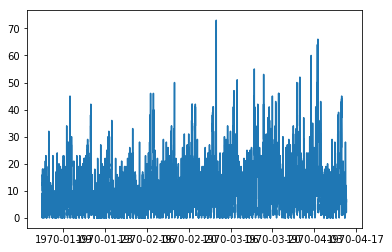

In [98]:
plt.plot(time,count1)
plt.show()

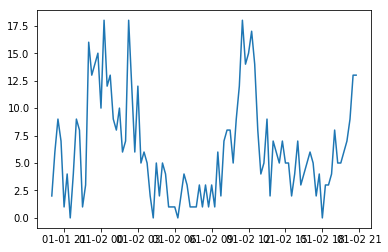

In [99]:
plt.plot(time[:100],count1[:100])
plt.show()

## Part 2

### 1.

I would choose profit (revenue minus reimbursed toll costs) as the key measure of success because the most important goal for a business is to maximize profit.

### 2a.

I would randomly assign 50% of drivers in both cities to Group A and the rest of the drivers in both cities to Group B. Group A would be given reimbursements for all tolls. Group B would not be given reimbursements for any tolls.

I would run the experiment for three months and then record the profit for each driver within each group. For Group A, the profit calculation is revenue minus all toll costs. For Group B, the profit calculation is just revenue.

### 2b.

I would use a difference of means test to determine the significance of the observation.

Null: The mean profit difference between Group A and Group B is equal to zero.

Alternative: The mean profit of Group A is greater than the mean profit of Group B.

### 2c.

If p < .05 then I would reject the null that the mean profit difference between Group A and B is zero and accept that the mean profit of Group A is greater than the mean profit of Group B. Thus, I would recommend that the company reimburse toll costs for all of its drivers.

## Part 3

### 1.

In [175]:
data = json.load((open('ultimate_data_challenge.json')))

In [176]:
data1 = pd.DataFrame.from_dict(data)

In [177]:
data1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [178]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [179]:
data1['signup_date'] = data1['signup_date'].astype('datetime64[ns]')
data1['last_trip_date'] = data1['last_trip_date'].astype('datetime64[ns]')

In [180]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [181]:
from datetime import datetime  
from datetime import timedelta 

In [182]:
data1['five_months'] = data1['signup_date'] + timedelta(days=30*5)

In [183]:
data1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,five_months
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-24
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-06-28
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-06-05
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-09
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-06-26


In [184]:
data1['active'] = data1['five_months'] - data1['last_trip_date']

In [185]:
data1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,five_months,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-24,7 days
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-06-28,54 days
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-06-05,149 days
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-09,-20 days
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-06-26,103 days


In [186]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
five_months               50000 non-null datetime64[ns]
active                    50000 non-null timedelta64[ns]
dtypes: bool(1), datetime64[ns](3), float64(6), int64(1), object(2), timedelta64[ns](1)
memory usage: 5.0+ MB


In [187]:
data1['active'] = data1['active'].astype('int')

In [188]:
data1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,five_months,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-24,604800000000000
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-06-28,4665600000000000
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-06-05,12873600000000000
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-09,-1728000000000000
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-06-26,8899200000000000


In [189]:
phone_none = data1[data1['phone'].isnull()]

In [190]:
phone_none.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 134 to 49868
Data columns (total 14 columns):
avg_dist                  396 non-null float64
avg_rating_by_driver      393 non-null float64
avg_rating_of_driver      300 non-null float64
avg_surge                 396 non-null float64
city                      396 non-null object
last_trip_date            396 non-null datetime64[ns]
phone                     0 non-null object
signup_date               396 non-null datetime64[ns]
surge_pct                 396 non-null float64
trips_in_first_30_days    396 non-null int64
ultimate_black_user       396 non-null bool
weekday_pct               396 non-null float64
five_months               396 non-null datetime64[ns]
active                    396 non-null int64
dtypes: bool(1), datetime64[ns](3), float64(6), int64(2), object(2)
memory usage: 43.7+ KB


In [191]:
data1 = data1.dropna(subset = ['phone'])

In [192]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      41578 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
five_months               49604 non-null datetime64[ns]
active                    49604 non-null int64
dtypes: bool(1), datetime64[ns](3), float64(6), int64(2), object(2)
memory usage: 5.3+ MB


In [193]:
data1['active_user'] = data1['active'].apply(lambda x: 1 if x <0 else 0)

In [194]:
data1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,five_months,active,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-24,604800000000000,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-06-28,4665600000000000,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-06-05,12873600000000000,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-09,-1728000000000000,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-06-26,8899200000000000,0


In [195]:
data2 = data1.drop(['last_trip_date','five_months','active','signup_date'],axis=1)

In [196]:
data2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [197]:
dummies_city = pd.get_dummies(data2['city'])

In [198]:
dummies_city.head()

,Astapor,King's Landing,Winterfell
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1


In [199]:
dummies_phone = pd.get_dummies(data2['phone'])

In [200]:
dummies_phone.head()

,Android,iPhone
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [201]:
data2['ultimate_black_user'] = data2['ultimate_black_user'].apply(lambda x: 1 if x == True else 0)

In [202]:
data2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,0,82.4,0


In [203]:
data3 = pd.concat([data2,dummies_city,dummies_phone],axis=1).drop(['city','phone'],axis=1)

In [204]:
data3.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,0,1,1,0


In [205]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      41578 non-null float64
avg_surge                 49604 non-null float64
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null int64
weekday_pct               49604 non-null float64
active_user               49604 non-null int64
Astapor                   49604 non-null uint8
King's Landing            49604 non-null uint8
Winterfell                49604 non-null uint8
Android                   49604 non-null uint8
iPhone                    49604 non-null uint8
dtypes: float64(6), int64(3), uint8(5)
memory usage: 4.0 MB


In [206]:
from sklearn.preprocessing import Imputer

In [207]:
dependent = data3['active_user']
dependent.head()

0    0
1    0
2    0
3    1
4    0
Name: active_user, dtype: int64

In [209]:
independent = data3.drop(['active_user'],axis=1)
independent.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,1,1,0


In [210]:
X = independent.as_matrix()
y = dependent.as_matrix()

In [211]:
len(X)

49604

In [212]:
len(y)

49604

In [214]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(X)
X = imp.transform(X)

In [215]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [216]:
dependent_df = dependent.to_frame()

In [219]:
dependent_df.head()

,active_user
0,0
1,0
2,0
3,1
4,0


In [218]:
len(dependent_df)

49604

In [222]:
len(dependent_df[dependent_df['active_user'] == 1])/len(dependent_df)

0.24421417627610675

24% of observed users (after dropping 396 users with phone as null) were retained.

### 2.

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42)

In [225]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()

In [226]:
clf_cv = cross_val_score(clf,X_train,y_train,cv=5)
clf_cv.mean()

0.7694541684910543

In [227]:
import numpy as np

In [233]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':['l1','l2'],
             'C':np.logspace(-5, 8, 15)}

In [234]:
clf_gridsearch = GridSearchCV(clf,param_grid,cv=5)

In [235]:
clf_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [236]:
clf_gridsearch.best_params_

{'C': 0.05179474679231213, 'penalty': 'l1'}

In [237]:
clf_gridsearch.best_score_

0.7696422331532403

In [239]:
clf_tuned = LogisticRegression(penalty='l1',C=.05179474679231213)

In [240]:
clf_tuned

LogisticRegression(C=0.05179474679231213, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [242]:
clf_tuned.fit(X_train,y_train)

LogisticRegression(C=0.05179474679231213, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [243]:
y_pred = clf_tuned.predict(X_test)

In [244]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [245]:
accuracy = clf_tuned.score(X_test, y_test)

In [246]:
accuracy

0.7657446980082251

I built a logistic regression model tuning the penalty to l1 and tuning C=.052. My model was able to correctly predict whether or not a user will be an active user in their sixth month of the system 76.6% of the time based on unseen data. 

### 3.

In [251]:
clf_tuned.coef_

array([[-0.2352499 , -0.04207294, -0.05460576, -0.00519846,  0.0540716 ,
         0.36178965,  0.34224883,  0.        , -0.23134697,  0.30208619,
         0.        , -0.09638959,  0.34753669]])

In [252]:
independent.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,1,1,0


The three most important features in order in predicting whether a user will be an active users after 6 months are:

1. the number of trips in the first 30 days
2. whether the user is an ultimate black user
3. the user is an iPhone user

Ultimate can improve rider retention by focusing on maximizing the number of trips its users take in the first 30 days. Ultimate can offer discounts to new users in the first 30 days to encourage users to use Ultimate more. Ultimate can also focus on encouraging new users to use ultimate black. Ultimate can also offer discounts to new users to try ultimate black.